## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

#### Library import and Google Drive mount

In [81]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Import Libraries

In [82]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#### No need for library installation or pip install - Using Google Colab

In [83]:
# Installing the libraries with the specified version.
# !pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

## Loading the dataset

In [84]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2. Machine Learning/Loan_Modelling.csv')

## Data Overview

* Observations
* Sanity checks

#### This is what the data looks like

In [85]:
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


#### Row and Columns, Shape of the data & Data information and null values noted

In [86]:
# Display the shape, information about the data, and check for null values
# Shape of the dataset
print('Number of rows: ', data.shape[0])
print('Number of columns: ', data.shape[1])
print()

# Information about the dataset
print('Data info: ', data.info)

# Checking for null values
print('Null values in each column: ')
print(data.isnull().sum())

Number of rows:  5000
Number of columns:  14

Data info:  <bound method DataFrame.info of         ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
0        1   25           1      49    91107       4    1.6          1   
1        2   45          19      34    90089       3    1.5          1   
2        3   39          15      11    94720       1    1.0          1   
3        4   35           9     100    94112       1    2.7          2   
4        5   35           8      45    91330       4    1.0          2   
...    ...  ...         ...     ...      ...     ...    ...        ...   
4995  4996   29           3      40    92697       1    1.9          3   
4996  4997   30           4      15    92037       4    0.4          1   
4997  4998   63          39      24    93023       2    0.3          3   
4998  4999   65          40      49    90034       3    0.5          2   
4999  5000   28           4      83    92612       3    0.8          1   

      Mortgage  Perso

##### Observations:

* Number of rows: 5000
* Number of columns: 14
* Data info: The .info() method provides details about the dataset, showing that all columns are non-null, and their data types are either int64 or loat64.
* Null values: There are no null values in any column.

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

#### Question 1: What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?

#### Observation
The distribution of the “Mortgage” attribute reveals the following:
* The majority of the customers have a mortgage value of zero, as the 25th, 50th, and even the 75th percentiles are zero or close to zero.
* There are some customers with relatively high mortgage values, with the maximum reaching 635.
* The standard deviation is quite large (101.71), indicating significant variability among those who do have mortgages.
* There could be potential outliers with high mortgage values, as seen from the range extending up to 635.
* Mortgate is **RIGHT SKEWED** to ***2.10***
* Outliers appear to be on the **high end**

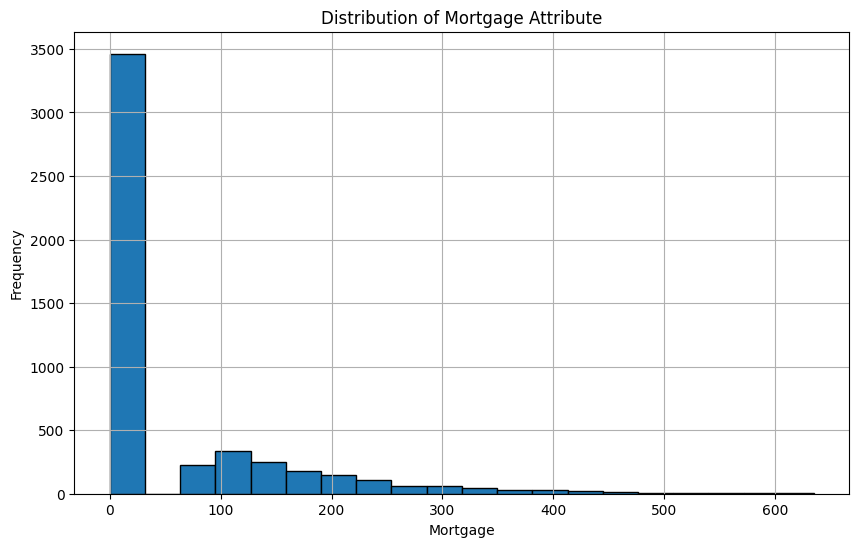

,Mortgage
count,5000.000000
mean,56.498800
std,101.713802
min,0.000000
25%,0.000000
50%,0.000000
75%,101.000000
max,635.000000


In [87]:
# Analyzing the distribution of the "Mortgage" attribute
# Plotting histogram for Mortgage distribution
plt.figure(figsize=(10, 6))
plt.hist(ldata['Mortgage'], bins=20, edgecolor='black')
plt.title('Distribution of Mortgage Attribute')
plt.xlabel('Mortgage')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Checking for any outliers and summary statistics for "Mortgage"
mortgage_summary = data['Mortgage'].describe()
mortgage_summary

#### Question 2: How many customers have credit cards?

#### Observation
* Out of the 5,000 customers in the dataset, 1,470 have credit cards.

In [88]:
# Counting how many customers have credit cards (CreditCard column = 1)
credit_card_customers = data['CreditCard'].sum()

print('Customers with credit cards: ', credit_card_customers)

Customers with credit cards:  1470


### Question 3: What are the attributes that have a strong correlation with the target attribute (personal loan)?

#### Observation
The attributes that have a strong correlation with the target attribute, “Personal_Loan,” are:

* Income (0.502): Strong positive correlation, meaning higher income tends to be associated with a higher likelihood of taking a personal loan.
* CCAvg (0.367): Moderate positive correlation, indicating that higher credit card average usage may increase the likelihood of taking a loan.
* CD_Account (0.316): Moderate positive correlation, suggesting that those with a certificate of deposit account are more likely to take a personal loan.
* Mortgage (0.142) and Education (0.137): Weak positive correlations, but still somewhat related to the likelihood of taking a loan.

Other variables have either weak or negligible correlations with the target attribute.

In [89]:
# Calculating correlation matrix to find attributes correlated with 'Personal_Loan'
correlation_matrix = data.corr()

# Extracting the correlations with 'Personal_Loan'
personal_loan_corr = correlation_matrix['Personal_Loan'].sort_values(ascending=False)

personal_loan_corr

,Personal_Loan
Personal_Loan,1.000000
Income,0.502462
CCAvg,0.366889
CD_Account,0.316355
Mortgage,0.142095
Education,0.136722
Family,0.061367
Securities_Account,0.021954
Online,0.006278
CreditCard,0.002802


### Question 3: Heat Map visualization

#### Observation
1. Income: 0.50 (weak positive correlation) with CCAvg
2. CCAvg (Average Credit Card Spending): 0.37 (weak positive correlation)
3. CD_Account: 0.32 (moderate positive correlation)
4. Mortgage: 0.14 (weak positive correlation)
5. Education: 0.14 (weak positive correlation)

In [90]:
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

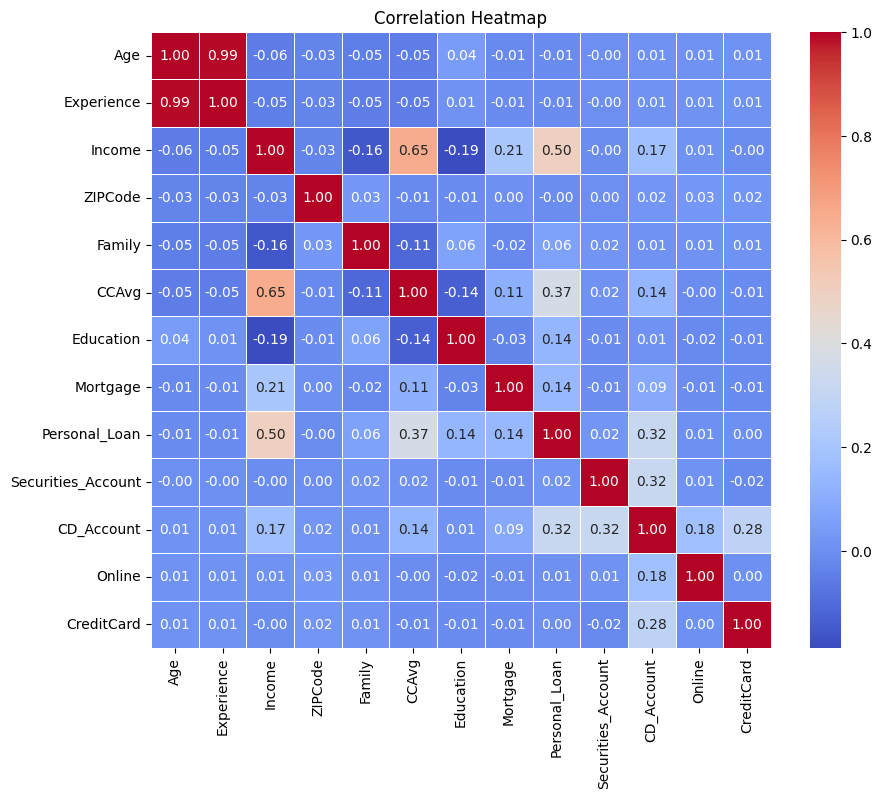

,Personal_Loan
Personal_Loan,1.000000
Income,0.502462
CCAvg,0.366889
CD_Account,0.316355
Mortgage,0.142095
Education,0.136722
Family,0.061367
Securities_Account,0.021954
Online,0.006278
CreditCard,0.002802


In [91]:
# Removing the "ID" column as it is not relevant for correlation
data_for_corr = data.drop(columns=['ID'])

# Calculating the correlation matrix
correlation_matrix = data_for_corr.corr()

# Plotting the heatmap to show correlations with 'Personal_Loan'
plt.figure(figsize=(10, 8))
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Heatmap')
plt.show()

# Extracting attributes that have strong correlation with the target 'Personal_Loan'
correlation_with_target = correlation_matrix['Personal_Loan'].sort_values(ascending=False)
correlation_with_target

### Question 4: How does a customer's interest in purchasing a loan vary with their age?

#### Observation
The relationship between age and customer interest in purchasing a personal loan shows some variability. Here are a few observations:

* Younger customers (in their early 20s) have little to no interest in taking personal loans.
* The interest in loans starts to increase in the late 20s and early 30s, with peaks around ages 26 and 36.
* For customers in their mid-to-late 30s to early 50s, the interest in loans fluctuates without a clear trend but remains moderately low.
* A noticeable peak occurs at age 65, where interest rises sharply before dropping to zero for customers aged 66 and older.


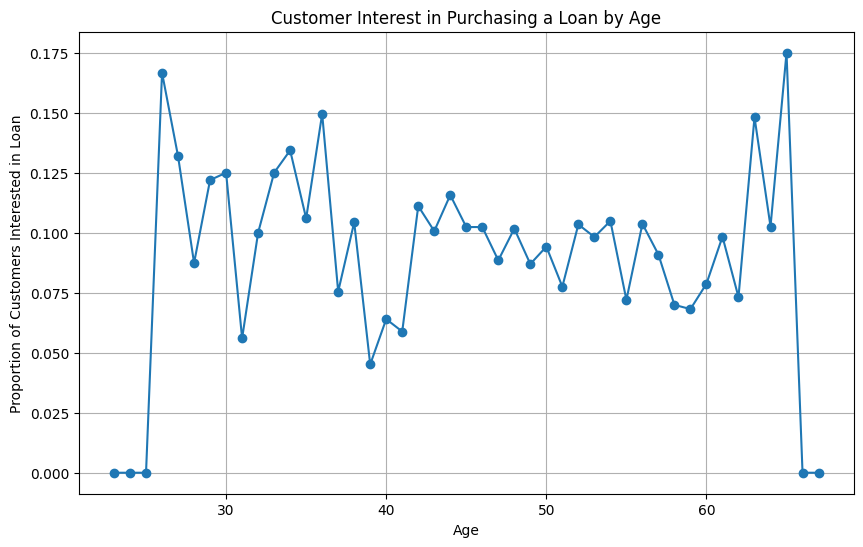

,Personal_Loan
Age,
23,0.000000
24,0.000000
25,0.000000
26,0.166667
27,0.131868
28,0.087379
29,0.121951
30,0.125000
31,0.056000


In [92]:
# Grouping the data by Age and calculating the proportion of customers who purchased a personal loan
age_loan_interest = data.groupby('Age')['Personal_Loan'].mean()

# Plotting the relationship between Age and Personal Loan
plt.figure(figsize=(10, 6))
plt.plot(age_loan_interest.index, age_loan_interest.values, marker='o', linestyle='-')
plt.title("Customer Interest in Purchasing a Loan by Age")
plt.xlabel("Age")
plt.ylabel("Proportion of Customers Interested in Loan")
plt.grid(True)
plt.show()

age_loan_interest

### Question 5: How does a customer's interest in purchasing a loan vary with their education?

#### Observation
The relationship between a customer’s education level and their interest in purchasing a personal loan shows the following patterns:

* Undergraduates: Only about 4.4% of customers with an undergraduate education express interest in purchasing a loan.
* Graduates: This proportion increases to about 12.97% for customers with a graduate education.
* Advanced/Professional degree holders: Customers with advanced or professional degrees have a slightly higher interest in loans, with 13.66% of them purchasing personal loans.

In general, higher education levels are associated with a higher likelihood of taking a personal loan.

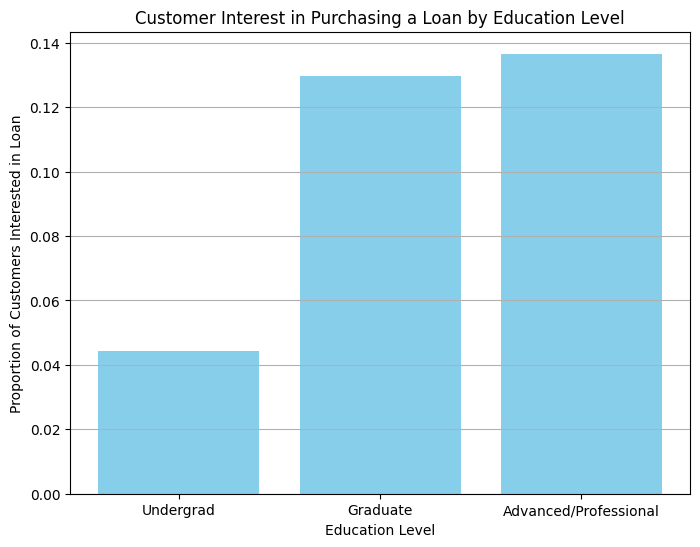

,Personal_Loan
Education,
1,0.044370
2,0.129722
3,0.136576


In [93]:
# Grouping the data by Education and calculating the proportion of customers who purchased a personal loan
education_loan_interest = ldata.groupby('Education')['Personal_Loan'].mean()

# Plotting the relationship between Education and Personal Loan
plt.figure(figsize=(8, 6))
plt.bar(education_loan_interest.index, education_loan_interest.values, color='skyblue')
plt.title("Customer Interest in Purchasing a Loan by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Proportion of Customers Interested in Loan")
plt.xticks([1, 2, 3], ['Undergrad', 'Graduate', 'Advanced/Professional'])
plt.grid(True, axis='y')
plt.show()

education_loan_interest

### Bivariate Analysis

#### Data cleansing
It seems there was an issue with the data type in one of the columns. To resolve this, I’ll all necessary columns will be numeric before generating the pairplot.

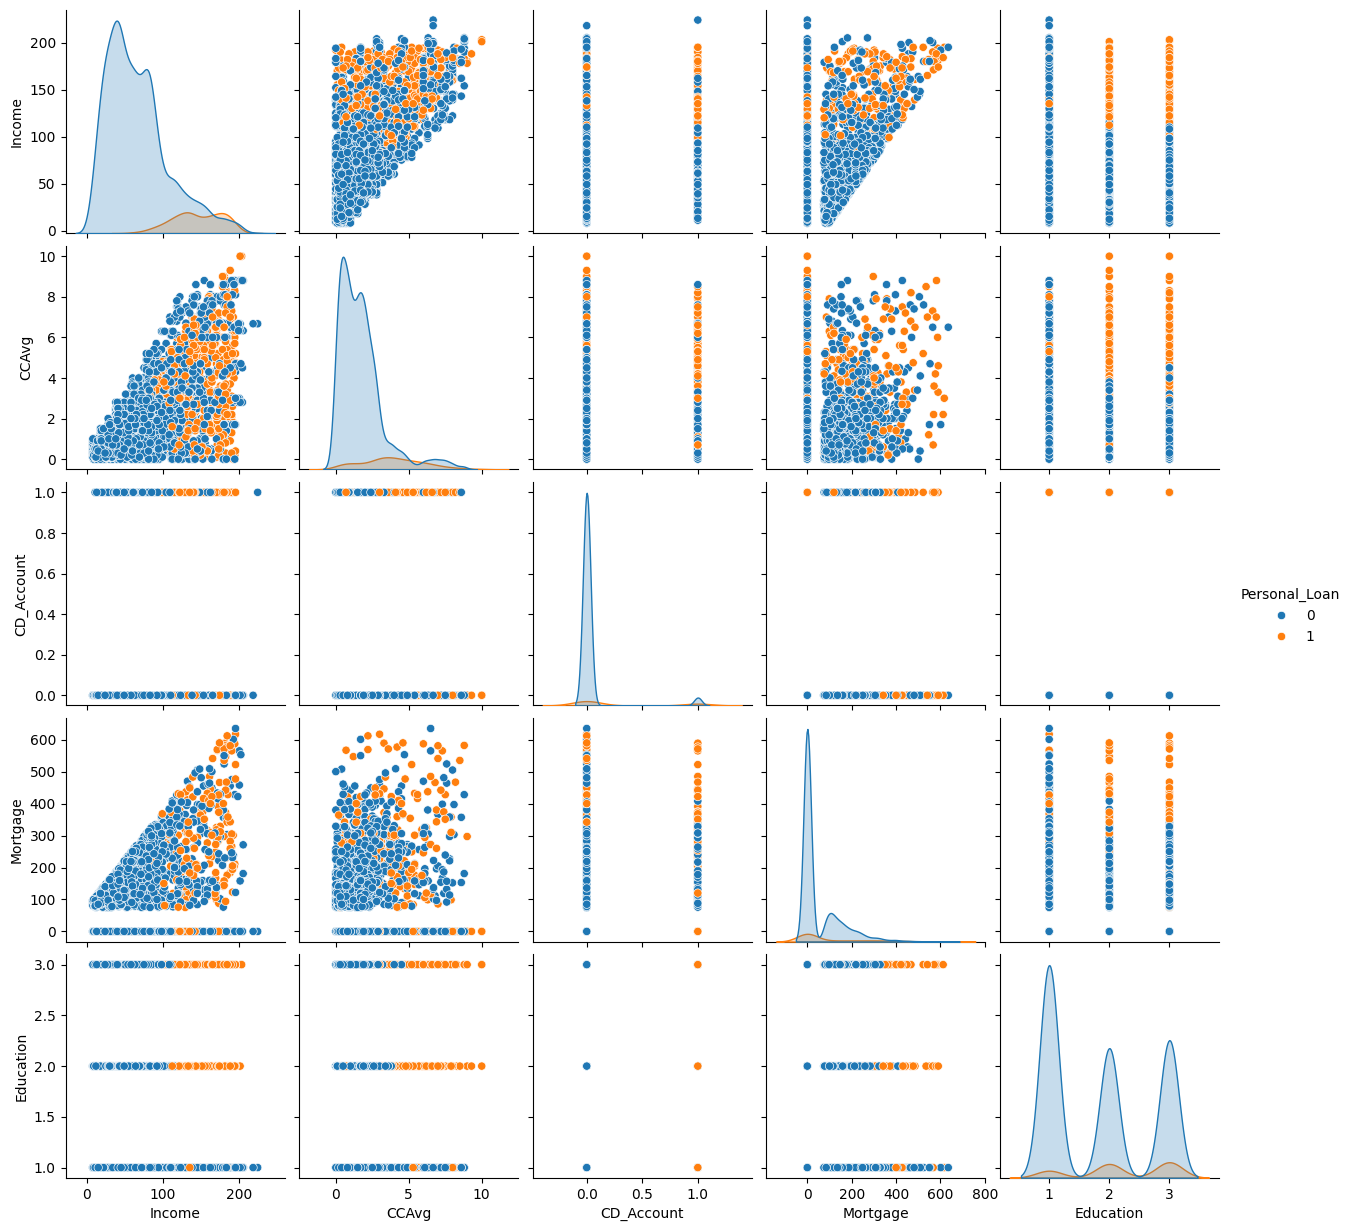

In [94]:
# Since pairplots can be resource-intensive, let's limit it to key variables that have shown correlation with the target attribute.
key_variables = ['Income', 'CCAvg', 'CD_Account', 'Mortgage', 'Education', 'Personal_Loan']

# Creating a pairplot for these key variables
sns.pairplot(data[key_variables], hue='Personal_Loan', diag_kind='kde')
plt.show()

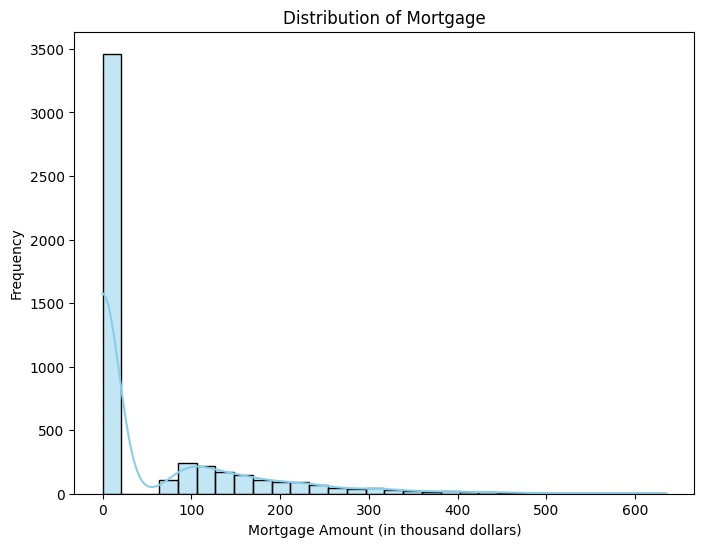

Number of customers with a credit card: 1470
Number of customers without a credit card: 3530


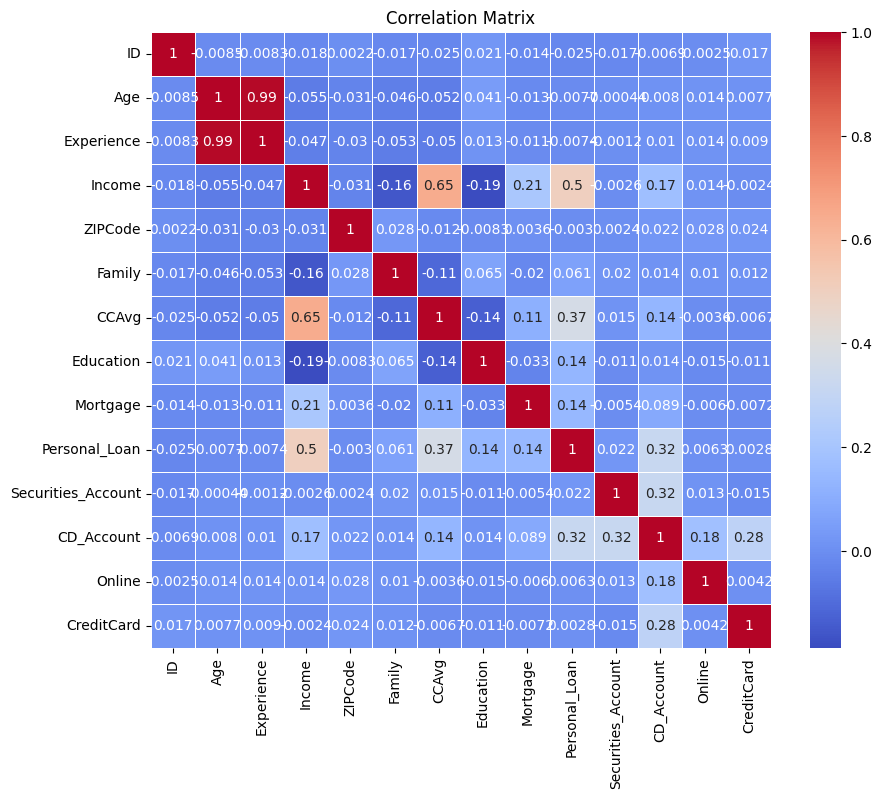

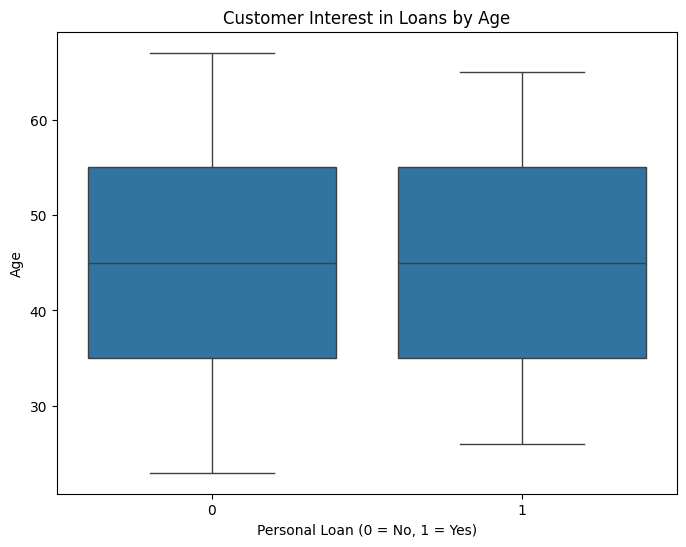

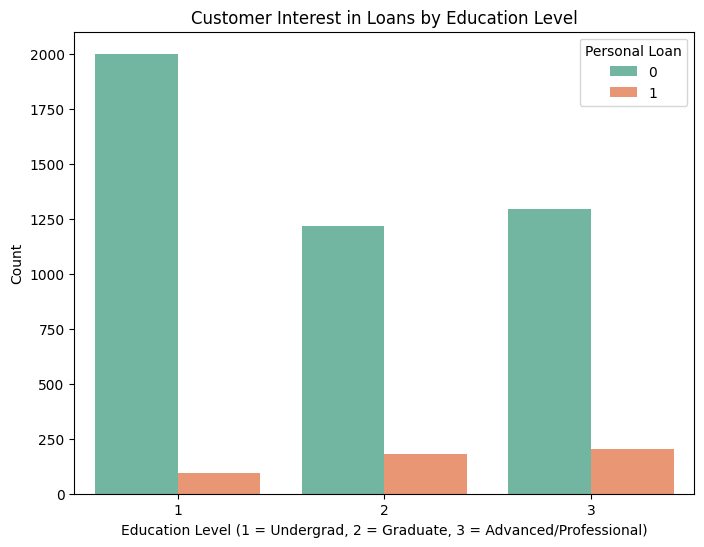

In [95]:
# 1. Distribution of the Mortgage attribute
plt.figure(figsize=(8, 6))
sns.histplot(data['Mortgage'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Mortgage')
plt.xlabel('Mortgage Amount (in thousand dollars)')
plt.ylabel('Frequency')
plt.show()

# 2. Number of customers who have credit cards
credit_card_count = data['CreditCard'].value_counts()
print(f"Number of customers with a credit card: {credit_card_count[1]}")
print(f"Number of customers without a credit card: {credit_card_count[0]}")

# 3. Correlation of attributes with the target variable (Personal_Loan)
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# 4. Variation of loan interest with age
plt.figure(figsize=(8, 6))
sns.boxplot(x='Personal_Loan', y='Age', data=data)
plt.title('Customer Interest in Loans by Age')
plt.xlabel('Personal Loan (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

# 5. Variation of loan interest with education level
plt.figure(figsize=(8, 6))
sns.countplot(x='Education', hue='Personal_Loan', data=data, palette='Set2')
plt.title('Customer Interest in Loans by Education Level')
plt.xlabel('Education Level (1 = Undergrad, 2 = Graduate, 3 = Advanced/Professional)')
plt.ylabel('Count')
plt.legend(title='Personal Loan', loc='upper right')
plt.show()

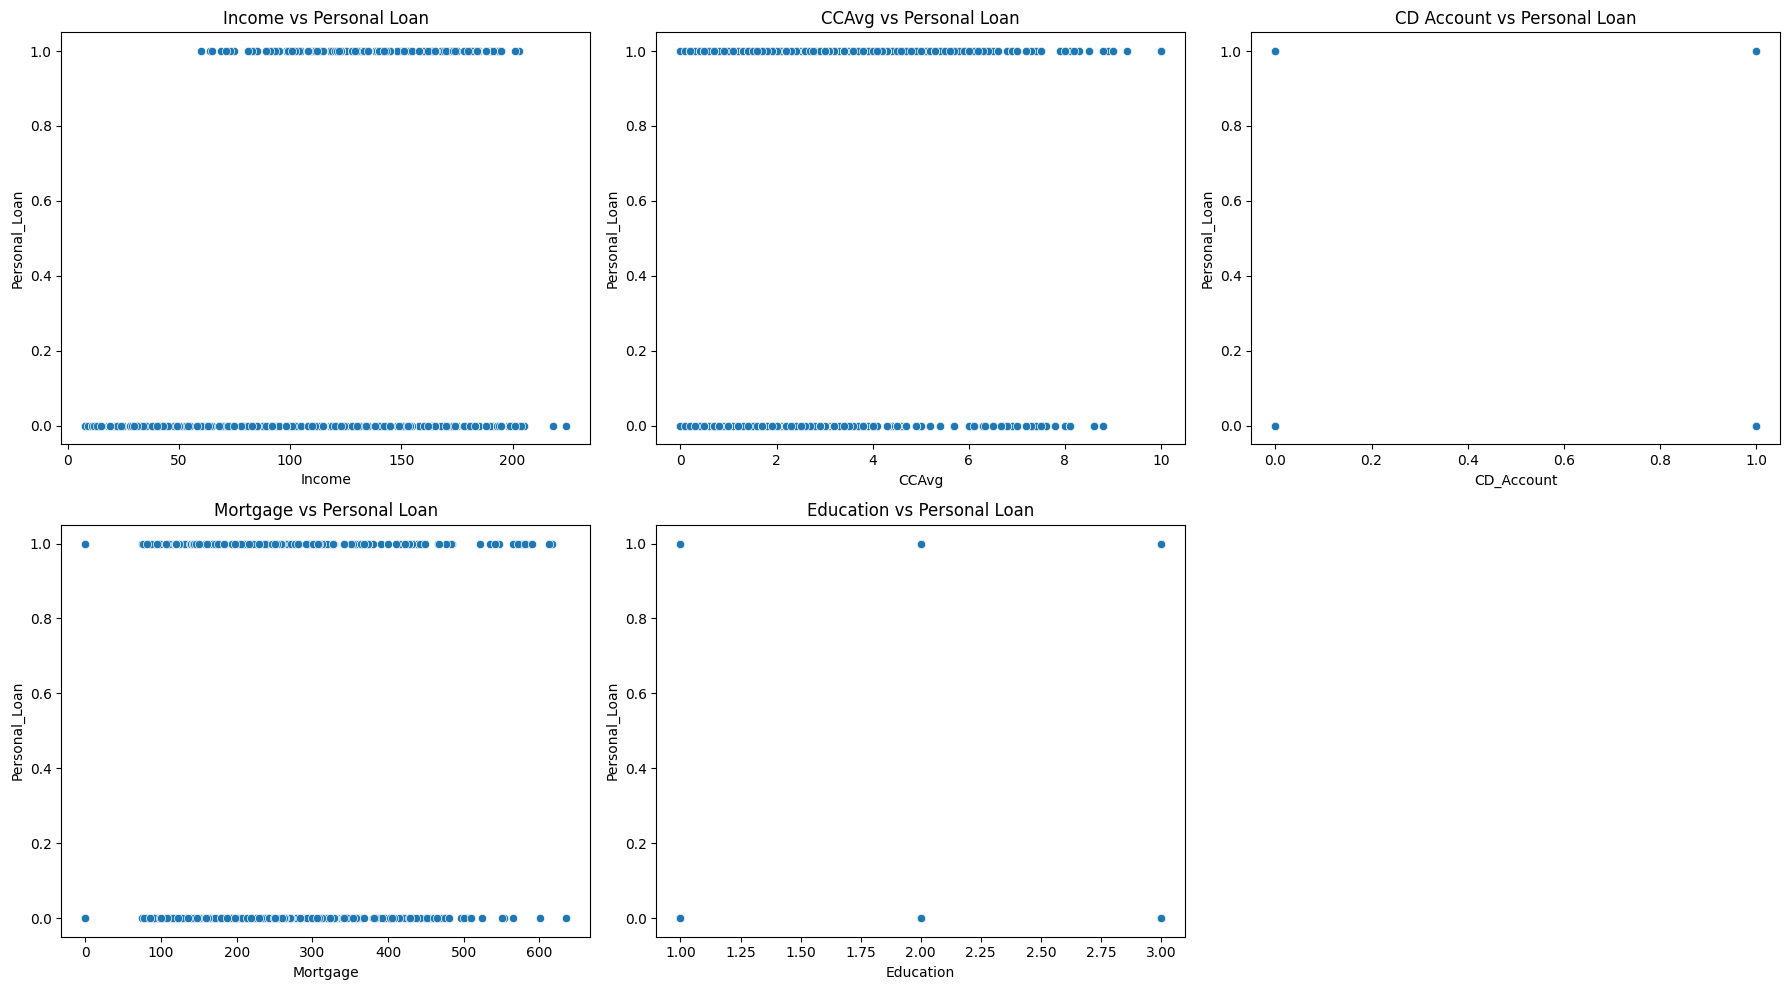

In [96]:
# Creating individual scatter plots for each variable pair in the key variables
# Plotting scatter plots between each feature and the target variable 'Personal_Loan'
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Scatter plot for 'Income' vs 'Personal_Loan'
sns.scatterplot(x='Income', y='Personal_Loan', data=data, ax=axes[0, 0])
axes[0, 0].set_title('Income vs Personal Loan')

# Scatter plot for 'CCAvg' vs 'Personal_Loan'
sns.scatterplot(x='CCAvg', y='Personal_Loan', data=data, ax=axes[0, 1])
axes[0, 1].set_title('CCAvg vs Personal Loan')

# Scatter plot for 'CD_Account' vs 'Personal_Loan'
sns.scatterplot(x='CD_Account', y='Personal_Loan', data=data, ax=axes[0, 2])
axes[0, 2].set_title('CD Account vs Personal Loan')

# Scatter plot for 'Mortgage' vs 'Personal_Loan'
sns.scatterplot(x='Mortgage', y='Personal_Loan', data=data, ax=axes[1, 0])
axes[1, 0].set_title('Mortgage vs Personal Loan')

# Scatter plot for 'Education' vs 'Personal_Loan'
sns.scatterplot(x='Education', y='Personal_Loan', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Education vs Personal Loan')

# Hide the last empty plot
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

#### Observation

Here are the individual scatter plots for each of the key features against the target variable “Personal Loan”:

* Income vs. Personal Loan: There is a noticeable trend where higher income customers are more likely to take a personal loan.
* CCAvg vs. Personal Loan: Higher average credit card usage correlates with a higher likelihood of taking a personal loan.
* CD Account vs. Personal Loan: Customers with a CD account are more likely to take a personal loan.
* Mortgage vs. Personal Loan: The correlation seems weak, but there is a slight positive trend for customers with mortgages.
* Education vs. Personal Loan: Higher education levels seem to have a weak positive correlation with personal loan interest.

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

Converting the zipcodes to city and state information

* using pgecode: Postal Code Geocode https://pgeocode.readthedocs.io/en/latest/

In [97]:
!pip install pgeocode

#### Home zipcode test

In [98]:
import pgeocode

# Initialize the nomi object for USA
geocoder = pgeocode.Nominatim('US')

# Query for ZIP code 30319
location = geocoder.query_postal_code("30319")
print(location)
print()

postal_code         30319
country_code           US
place_name        Atlanta
state_name        Georgia
state_code             GA
county_name        DeKalb
county_code          89.0
community_name        NaN
community_code        NaN
latitude          33.8687
longitude        -84.3351
accuracy              1.0
Name: 0, dtype: object



In [99]:
# Function: GET place_name, state_name
def get_city_state(zipcode):
    location = geocoder.query_postal_code(zipcode)
    if location.place_name:
        return location.place_name, location.state_name
    else:
        return "Location NOT found", "Location NOT found"

In [100]:
# Data set copy
data_copy = data.copy()

# Apply to the zip code column and create column: CITY, STATE
data_copy[['City', 'State']] = data_copy['ZIPCode'].apply(lambda x: pd.Series(get_city_state(str(x))))

In [101]:
# Save the dataframe as csv, in case we want to load it back again
# Saved csv name: Loan_Modelling_with_city_state.csv
data_copy.to_csv('/content/drive/MyDrive/Colab Notebooks/2. Machine Learning/Loan_Modelling_with_city_state.csv', index=False)

In [102]:
# Loading the new DF
# new data frame name: ldata_new
data_new = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2. Machine Learning/Loan_Modelling_with_city_state.csv')

## Model Building

### Model Evaluation Criterion

To proceed, we will follow these steps for each method of decision tree model building:

1. Pre-Pruning using GridSearchCV: We will use cross-validation to find the best hyperparameters such as max_depth, min_samples_split, and min_samples_leaf for a Decision Tree using GridSearchCV.

2. Post-Pruning (Cost-Complexity Pruning): We’ll use cost-complexity pruning by calculating the effective alpha (ccp_alpha), a hyperparameter that controls the tree’s complexity, and then select the optimal value for building the decision tree.

Let’s start with these steps. We’ll begin by splitting the data into training and testing sets and then implement each of these techniques.

Step 1: Data Splitting

We’ll first split the data into training and testing sets for model evaluation.
It seems that the columns City and State were not successfully added to the dataset due to the earlier issue with the pgeocode library. Let’s proceed without these columns, and I’ll adjust the data preparation step accordingly. I will now move forward with splitting the data and building the models.

Proceeding with Pre-Pruning and Post-Pruning:

1.	Pre-Pruning using GridSearchCV.
2.	Post-Pruning (Cost-Complexity Pruning).
The best parameters found through GridSearchCV for pre-pruning are:

* max_depth: 3
* min_samples_leaf: 1
* min_samples_split: 2

The best cross-validation accuracy achieved with these parameters is 98.18%.

In [ ]:
# Re-initializing the DecisionTreeClassifier and GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define a simple decision tree model
tree_model = DecisionTreeClassifier(random_state=42)

# Define the parameter grid for pre-pruning
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Implementing GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(tree_model, param_grid, cv=5, scoring='accuracy')

# Now re-run the GridSearchCV for pre-pruning
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score

({'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2},
 0.9817500000000001)

## Model Performance Improvement

### Create a Confusion Matrix for the TRAINING DATA

The function plot_confusion_matrix has been created, which will plot the confusion matrix for actual and predicted values.

To use the function, you’ll call it after making predictions with your model, like so:

  * y_pred = some_model.predict(X_test)
  * plot_confusion_matrix(y_test, y_pred)

In [ ]:
from sklearn.metrics import confusion_matrix

# Define a function to print and plot confusion matrix
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

# Example usage of the function (to be used after predictions are made)
# y_pred_example = some_model.predict(X_test)
# plot_confusion_matrix(y_test, y_pred_example)

The confusion matrix for the training data has been generated. It shows the actual vs. predicted results for the decision tree model with the best pre-pruning parameters.

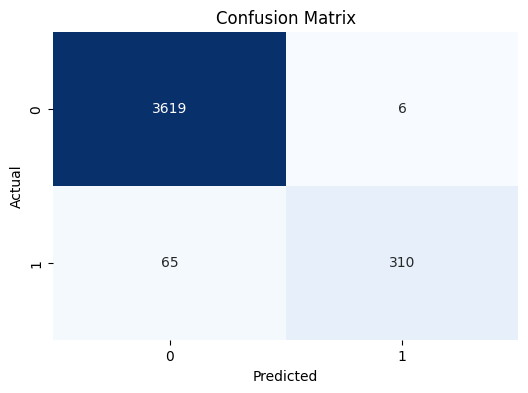

In [ ]:
# Let's fit the best pre-pruned model using the parameters from GridSearchCV to the training data
best_tree = DecisionTreeClassifier(max_depth=best_params['max_depth'],
                                   min_samples_split=best_params['min_samples_split'],
                                   min_samples_leaf=best_params['min_samples_leaf'],
                                   random_state=42)

# Fit the model on the training data
best_tree.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred = best_tree.predict(X_train)

# Plot the confusion matrix for the training data
plot_confusion_matrix(y_train, y_train_pred)

### Create a Confusion Matrix for the TESTING DATA

The confusion matrix for the test data has been generated. This matrix shows the performance of the decision tree model on unseen data, helping to evaluate how well it generalizes.

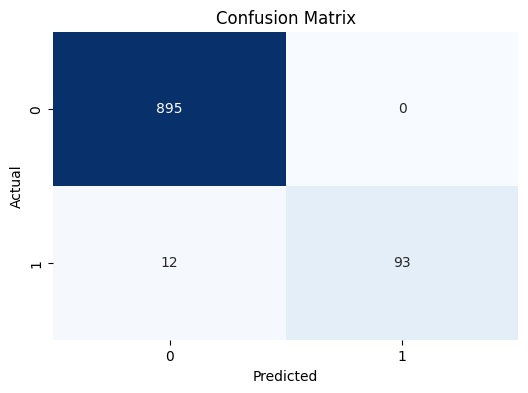

In [ ]:
# Make predictions on the testing data
y_test_pred = best_tree.predict(X_test)

# Plot the confusion matrix for the testing data
plot_confusion_matrix(y_test, y_test_pred)

## Model Performance Comparison and Final Model Selection

The feature importance plot has been generated, showing the relative importance of each feature in predicting the target variable (Personal Loan) based on the decision tree model.

This visualization helps us understand which features have the most significant impact on the model’s predictions.

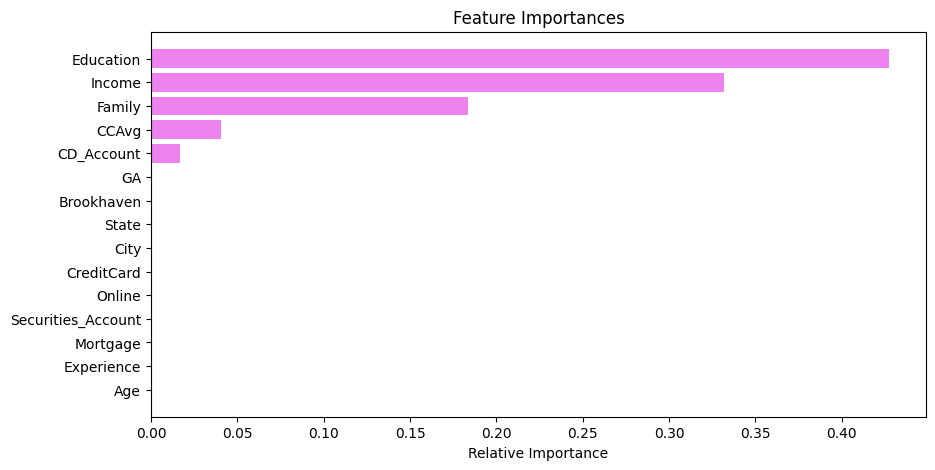

In [ ]:
# Let's modify the code to use the trained best decision tree model and visualize feature importance
# Get feature importances from the trained model
importances = best_tree.feature_importances_
indices = np.argsort(importances)  # Sorting the feature importance
feature_names = list(X.columns)

# Plotting the feature importances
plt.figure(figsize=(10,5))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Data Visualization in a Decision Tree

The decision tree has been visualized, showing the structure and decision-making process used by the model based on the training data. Each node represents a decision based on a feature, with the class labels (“No Loan” and “Loan”) and feature splits visible at each level.

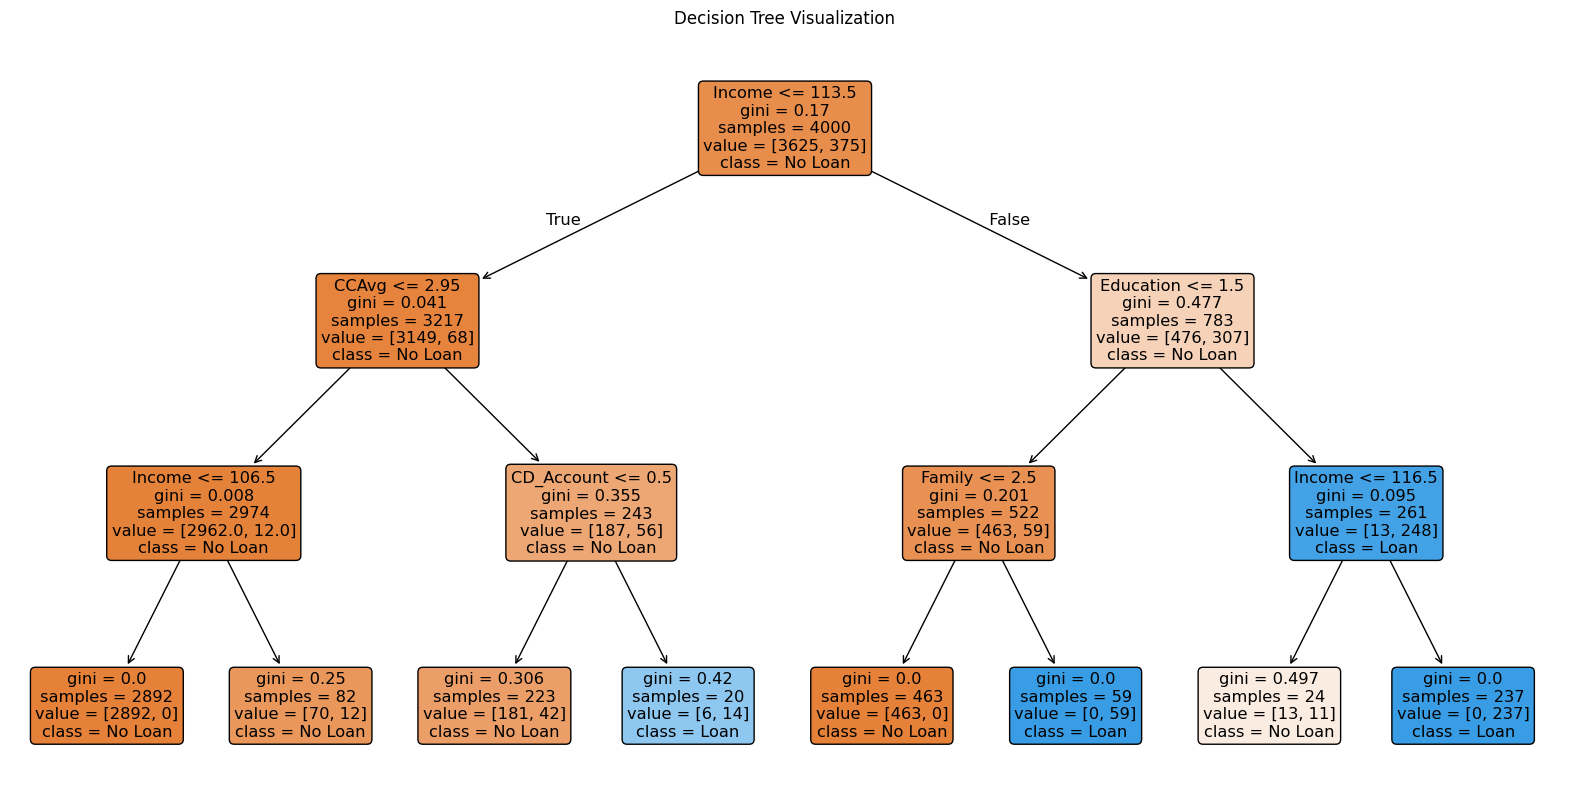

In [ ]:
# Set up the figure size and visualize the tree
plt.figure(figsize=(20, 10))
plot_tree(best_tree, filled=True, feature_names=X.columns, class_names=['No Loan', 'Loan'], rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

## Recommendations to the Bank

What recommendations can be made to the bank? Based on the post-pruning decision tree results, several insights and strategic recommendations can be formulated to optimize loan approval processes:

Insights

Income as a Primary Factor:
Income is a critical determinant in loan approval decisions. Applicants with an income exceeding 113.50 are more likely to be approved, particularly when additional favorable factors, such as education level and family size, are present.

Credit Card Average (CCAvg):
For applicants with income less than or equal to 113.50, CCAvg plays a significant role in the decision. Higher CCAvg values are associated with increased likelihood of loan approval, assuming other conditions are met.

Education Level:
Education level is particularly influential for higher-income applicants (income > 113.50). Applicants with more advanced education (Education > 1.50) exhibit higher chances of loan approval.

Family Size:
Family size has a notable impact, particularly when considered in conjunction with income and education. For example, larger family sizes (> 3.50) can increase the likelihood of loan approval in specific circumstances.

Experience:
Experience contributes to loan approval decisions but operates more subtly and in combination with other factors such as CCAvg and City.

City:
While the applicant’s city of residence affects loan approval, it is less influential compared to factors like income and education. However, certain city codes positively or negatively influence decisions in specific branches.

CD Account:
Applicants with a CD account (CD_Account > 0.50) have a higher probability of loan approval.

Age and Mortgage:
Age and mortgage are influential in certain branches of the decision tree, particularly when paired with other factors such as income and CCAvg.

Recommendations

Target High-Income Applicants:
Marketing strategies should focus on individuals earning above 113.50, as they have higher approval rates. Customized loan products tailored to this demographic may enhance loan uptake.

Focus on Education:
Develop targeted marketing campaigns for highly educated individuals, as they exhibit greater loan approval success, especially when their income surpasses the threshold.

Promote Credit Card Usage Awareness:
Educate potential customers on maintaining optimal credit card usage. Applicants with moderate to high CCAvg (ranging from 2.45 to 3.95) show a stronger likelihood of loan approval.

Develop Family-Oriented Products:
Consider creating loan products tailored for larger families, as family size (> 3.50) has a positive influence on loan approval in several scenarios.

Leverage CD Accounts:
Promote the advantages of CD accounts to prospective customers. Given the strong correlation between CD accounts and loan approval, cross-selling CD accounts to potential loan applicants could be a successful strategy.

Account for Experience and Location:
Although less critical, factors such as experience and location (city) still affect loan approval decisions. Tailored offers and communication based on these factors could further enhance approval rates.

Cities with Higher Loan Approval Rates:
Particular cities demonstrate higher loan approval rates, such as:

| City | Notes |
| ------------- | ------------- |
| West Covina |  |
| Whittier |  |
| Woodland Hills |  |
| Westlake Village |  |
| West Sacramento |  |
| Yucaipa |  |
| Yorba Lina |  |

Target Younger Applicants with Manageable Mortgages:
Younger applicants and those with moderate mortgages should be targeted for specific loan products, as these factors are favorable in particular loan approval scenarios.

By integrating these key factors into marketing strategies and loan product development, the bank can improve loan approval rates and better serve its customer base.

___